libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Images have been saved to templates_stripped without color profiles.


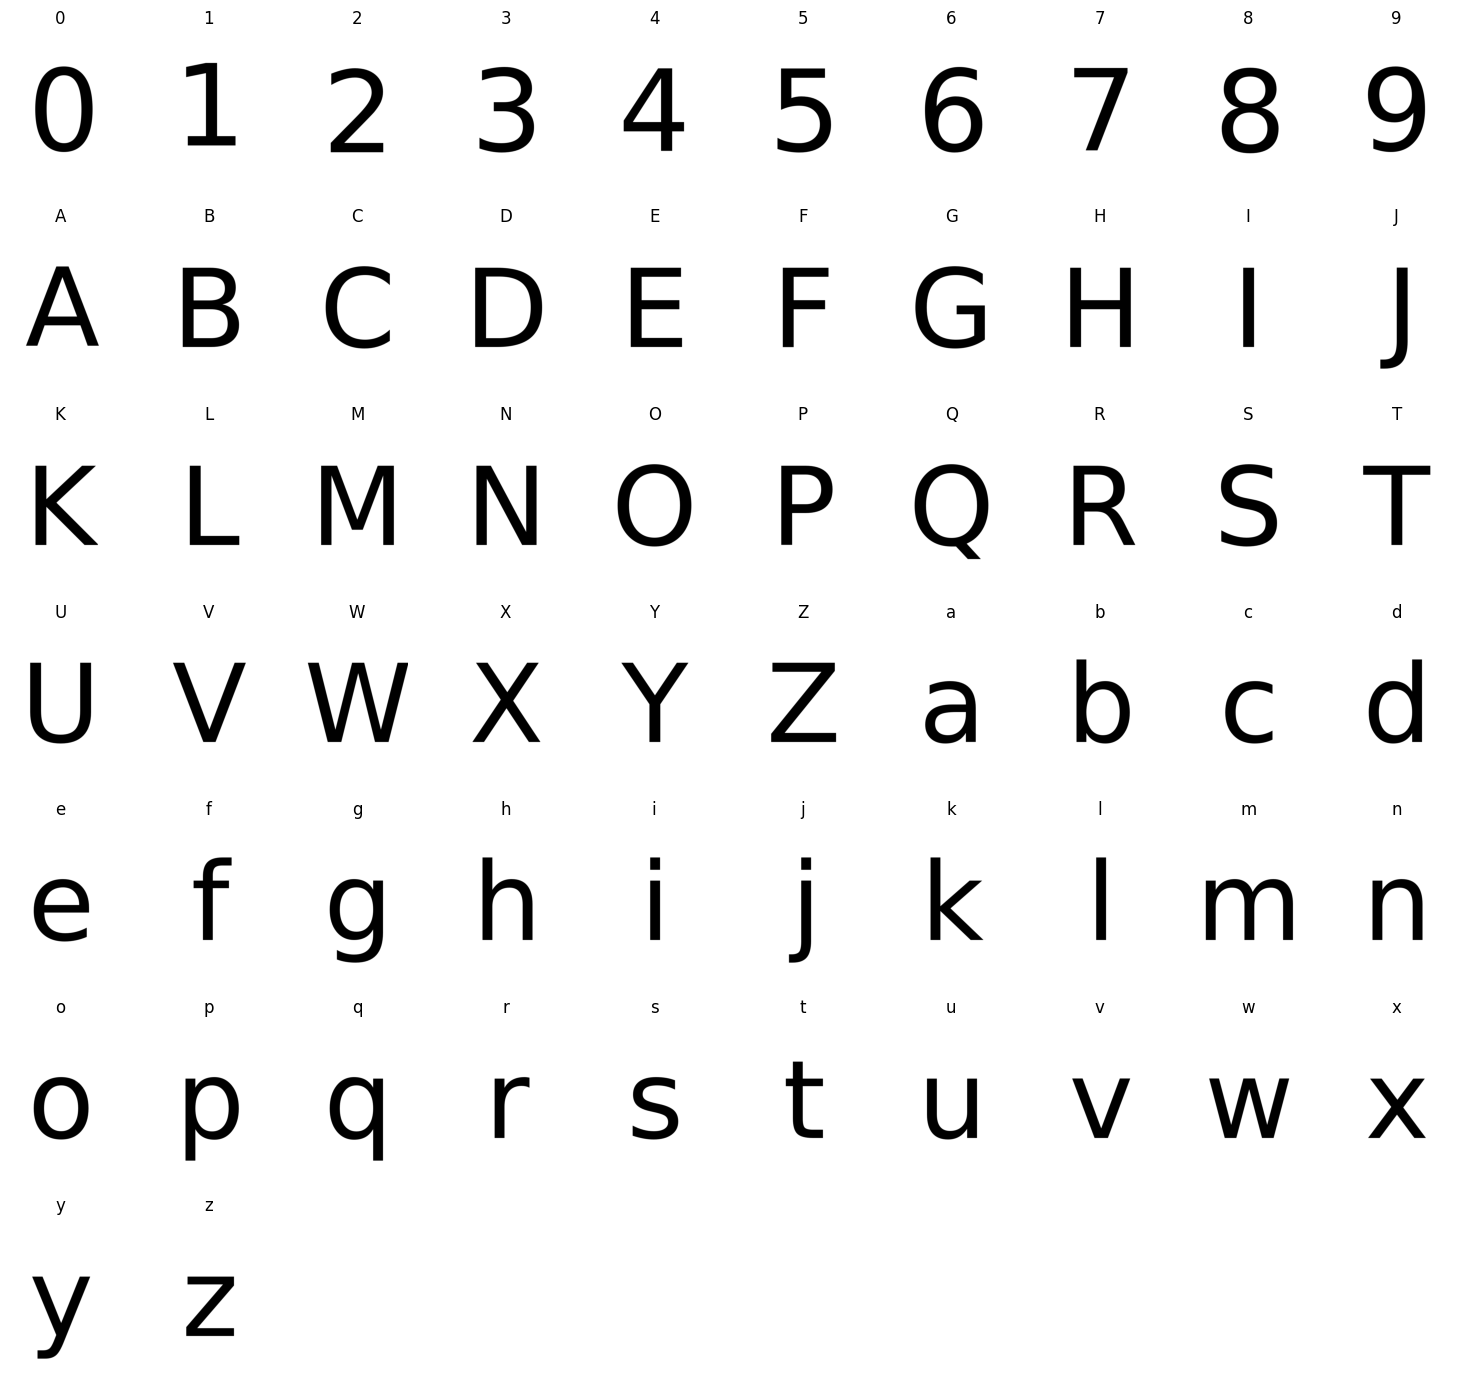

In [23]:
import os
import cv2
import matplotlib.pyplot as plt
import re
import warnings

# Suppress specific warnings about incorrect sRGB profiles
warnings.filterwarnings("ignore", message="libpng warning: iCCP: known incorrect sRGB profile")

# Directories
input_dir = "template1"       # Directory with original templates
output_dir = "templates_stripped"  # Directory to save templates without color profiles

# Step 1: Clear the Output Directory to Ensure Overwriting
if os.path.exists(output_dir):
    for file in os.listdir(output_dir):
        file_path = os.path.join(output_dir, file)
        if os.path.isfile(file_path):
            os.remove(file_path)
else:
    os.makedirs(output_dir)

# Step 2: Read and Save Images without Color Profiles
for filename in os.listdir(input_dir):
    if filename.endswith(".png"):
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)
        
        # Save the image to the new directory to remove metadata
        cv2.imwrite(os.path.join(output_dir, filename), image)

print("Images have been saved to", output_dir, "without color profiles.")

# Step 3: Load and Display Templates with Correct Labels (Including Lowercase and Digits)
# Regular expression to match letters (uppercase and lowercase) and digits
pattern = re.compile(r'^([a-zA-Z0-9])')  # Matches uppercase/lowercase letters or digits at the start

# Load all filenames from the new directory
filenames = [f for f in sorted(os.listdir(output_dir)) if f.endswith(".png")]

# Calculate grid size for displaying templates based on the number of images
num_images = len(filenames)
num_cols = 10  # Set number of columns for display grid
num_rows = (num_images // num_cols) + 1 if num_images % num_cols != 0 else num_images // num_cols

# Create subplots for displaying templates
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 2))
axes = axes.flatten()

for i, filename in enumerate(filenames):
    if i >= len(axes):  # Stop if there are more images than subplots
        break
    
    # Extract the character label from the filename using regex
    match = pattern.match(filename)
    if match:
        label = match.group(1)  # Get the matched letter or digit
        template = cv2.imread(os.path.join(output_dir, filename), cv2.IMREAD_GRAYSCALE)
        
        # Display the template with its label
        axes[i].imshow(template, cmap='gray')
        axes[i].set_title(label)
        axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
